In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random


from collections import OrderedDict
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:

random.seed(100000)

In [8]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp1-26.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp1-26.csv") 

In [9]:
X = pd.concat([X1, X2], axis=1)

In [10]:
# Extracting Feature names
feature_names = X.columns

In [11]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [12]:
# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

In [13]:
# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# For CV 5

In [14]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [27],
            "bootstrap": [True, False],
            }

In [15]:

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [16]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [27],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [17]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 27,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000000902
MSE for Random Forest on test data:  0.0000259138


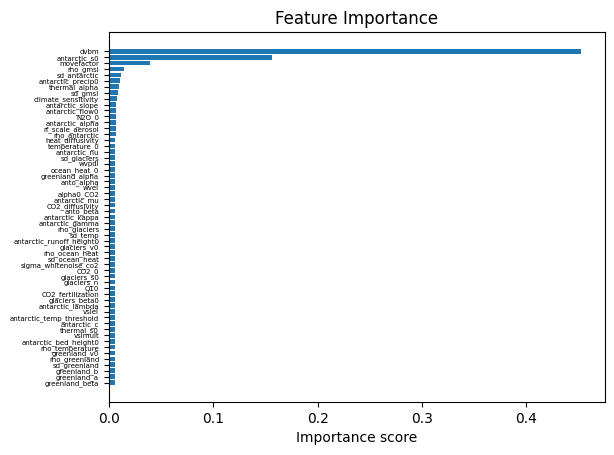

In [18]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=27)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP2-45

In [19]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp2-45.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp2-45.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [20]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [25],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [21]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [25],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [22]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000003007
MSE for Random Forest on test data:  0.0000825051


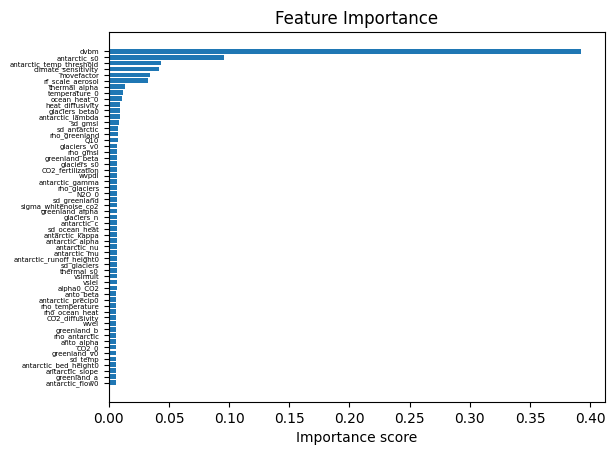

In [23]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=27)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP4-60

In [24]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp4-60.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp4-60.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [25]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [18],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [26]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [18],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

In [27]:
param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [4],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 18,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000006566
MSE for Random Forest on test data:  0.0001165053


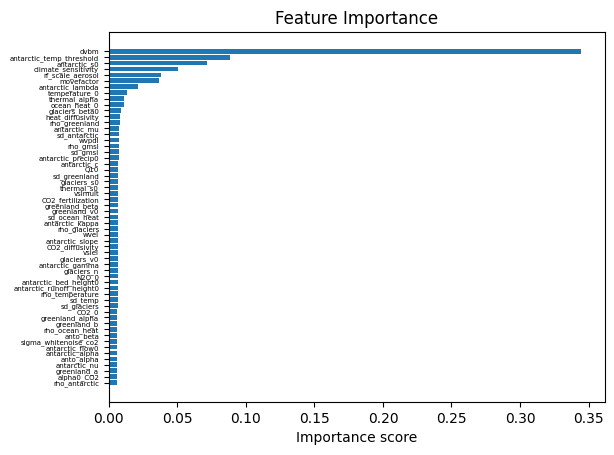

In [28]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=18)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");

# SSP5-85

In [29]:
# Loading Data
X1 = pd.read_csv("Data\parameters_subsample_sneasybrick.csv") 
X2 = pd.read_csv("Data\sneasybrick-ciam_CIAMparameterSamples_nyc_ssp5-85.csv") 
Y = pd.read_csv("Data\sneasybrick-ciam_NPVtrials_nyc_ssp5-85.csv") 

X = pd.concat([X1, X2], axis=1)

# Extracting Feature names
feature_names = X.columns

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [35]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid = { 
            "n_estimators"      : [90, 100, 115, 125, 130, 133, 140, 150, 155, 160],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [37],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 37,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 140}

In [36]:
# Defining hyperparameters and fitting the model

param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
            "max_depth": [37],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 37,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 140}

In [37]:
param_grid = { 
            "n_estimators"      : [140],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2],
            "max_depth": [10, 15, 18, 20, 25, 27, 30, 33, 37, 40],
            "bootstrap": [True, False],
            }

CV5_reg = GridSearchCV(estimator=reg, param_grid=param_grid, cv= 5)
CV5_reg.fit(X_train, y_train)

# Getting the best parameters

CV5_reg.best_params_

{'bootstrap': False,
 'max_depth': 37,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 140}

MSE for Random Forest on CV train data:  0.0000022375
MSE for Random Forest on test data:  0.0003872976


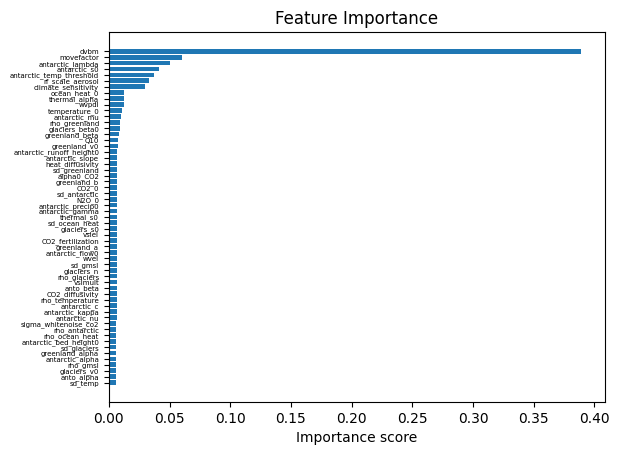

In [38]:
# Fitting the model with the best parameters

reg_cv5 = RandomForestRegressor(random_state=42, bootstrap=False, max_features='sqrt', min_samples_split = 4, 
n_estimators= 140, max_depth=18)
reg_cv5.fit(X_train, y_train)
pred=reg_cv5.predict(X_train)
pred_test=reg_cv5.predict(X_test)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", "{:.10f}".format(float(mean_squared_error(y_train, pred))))
print("MSE for Random Forest on test data: ", "{:.10f}".format(float(mean_squared_error(y_test, pred_test))))


# Obtaining feature importance
feature_importance_cv5 = reg_cv5.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance_cv5)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance_cv5[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx], size =5)

plt.title("Feature Importance")
plt.xlabel("Importance score");